 I will show how we can do Weather Forecasting with Machine Learning algorithm and compare some frameworks for further classification.
  Lets start this task by importing the libraries

In [4]:
import numpy as np # For Linear Algebra
import pandas as pd # To Work With Data
# for visualizations
import plotly.express as px 
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime # Time Series analysis.

read the data set

In [5]:
df = pd.read_csv("Weather.csv")

To look at first 5 rows of the data

In [6]:
df.head() # This will show us top 5 rows of the dataset by default.

Unnamed: 0  YEAR    JAN    FEB    MAR    APR    MAY    JUN    JUL    AUG  \
0           0  1901  17.99  19.43  23.49  26.41  28.28  28.60  27.49  26.98   
1           1  1902  19.00  20.39  24.10  26.54  28.68  28.44  27.29  27.05   
2           2  1903  18.32  19.79  22.46  26.03  27.93  28.41  28.04  26.63   
3           3  1904  17.77  19.39  22.95  26.73  27.83  27.85  26.84  26.73   
4           4  1905  17.40  17.79  21.78  24.84  28.32  28.69  27.67  27.47   

     SEP    OCT    NOV    DEC  
0  26.26  25.08  21.73  18.95  
1  25.95  24.37  21.33  18.78  
2  26.34  24.57  20.96  18.29  
3  25.84  24.36  21.07  18.84  
4  26.29  26.16  22.07  18.71

We have got an unexpected column named Unnamed: 0. Well, this is a very common problem. We face this when our csv file has an index column which has no name. here is how we can get rid of it.

In [7]:
df = pd.read_csv("Weather.csv", index_col=0)

Now, we’ll make an attribute that would contain date (month, year). So that we could get temperature values with the timeline.

In [8]:
df1 = pd.melt(df, id_vars='YEAR', value_vars=df.columns[1:]) ## This will melt the data
df1.head() 

YEAR variable  value
0  1901      JAN  17.99
1  1902      JAN  19.00
2  1903      JAN  18.32
3  1904      JAN  17.77
4  1905      JAN  17.40

In [9]:
df1['Date'] = df1['variable'] + ' ' + df1['YEAR'].astype(str)  
df1.loc[:,'Date'] = df1['Date'].apply(lambda x : datetime.strptime(x, '%b %Y')) ## Converting String to datetime object
df1.head()

YEAR variable  value                 Date
0  1901      JAN  17.99  1901-01-01 00:00:00
1  1902      JAN  19.00  1902-01-01 00:00:00
2  1903      JAN  18.32  1903-01-01 00:00:00
3  1904      JAN  17.77  1904-01-01 00:00:00
4  1905      JAN  17.40  1905-01-01 00:00:00

Temperature through time

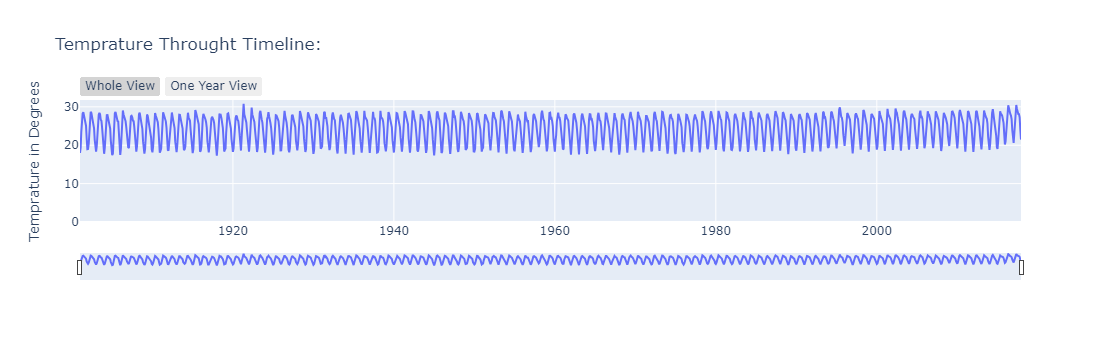

In [10]:
df1.columns=['Year', 'Month', 'Temprature', 'Date']
df1.sort_values(by='Date', inplace=True) ## To get the time series right.
fig = go.Figure(layout = go.Layout(yaxis=dict(range=[0, df1['Temprature'].max()+1])))
fig.add_trace(go.Scatter(x=df1['Date'], y=df1['Temprature']), )
fig.update_layout(title='Temprature Throught Timeline:',
                 xaxis_title='Time', yaxis_title='Temprature in Degrees')
fig.update_layout(xaxis=go.layout.XAxis(
    rangeselector=dict(
        buttons=list([dict(label="Whole View", step="all"),
                      dict(count=1,label="One Year View",step="year",stepmode="todate")                      
                     ])),
        rangeslider=dict(visible=True),type="date")
)
fig.show()

On a closer look, by clicking on One Year View, we can see that the graph seems distorted because this is how the values really are. The temperature varies every year with months.

Insights:
May 1921 has been the hottest month in india in the history. What could be the reason ?
Dec, Jan and Feb are the coldest months. One could group them together as “Winter”.
Apr, May, Jun, July and Aug are the hottest months. One could group them together as “Summer”.

But, since this is not how seasons work. We have four main seasons in India and this is how they are grouped:
Winter : December, January and February.
Summer(Also called, “Pre Monsoon Season”) : March, April and May.
Monsoon : June, July, August and September.
Autumn(Also called “Post Monsoon Season) : October and November.
We also will stick to these seasons for our analysis.

Warmest /Coldest/Average :

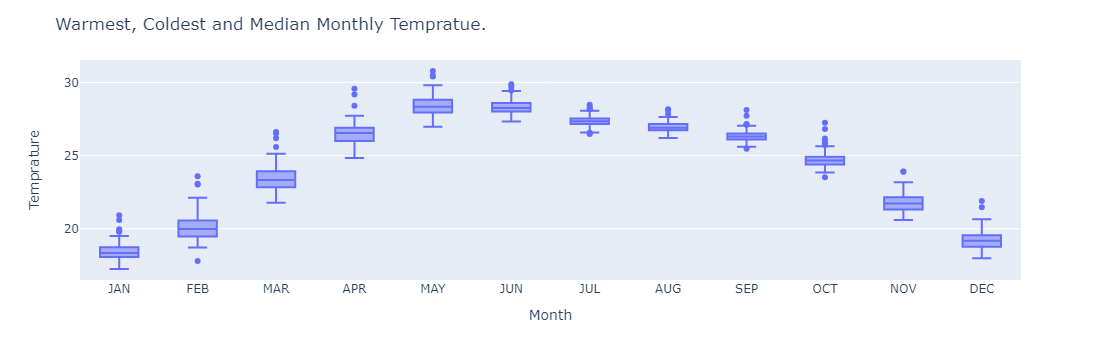

In [11]:
fig = px.box(df1, 'Month', 'Temprature')
fig.update_layout(title='Warmest, Coldest and Median Monthly Tempratue.')
fig.show()

Insights:
January has the coldest Days in an Year.
May has the hottest days in an Year.
July is the month with least Standard Deviation which means, temperature in July vary least. We can expect any day in July to be a warm day.

C:\Users\mohdf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\mohdf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\mohdf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\mohdf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the w

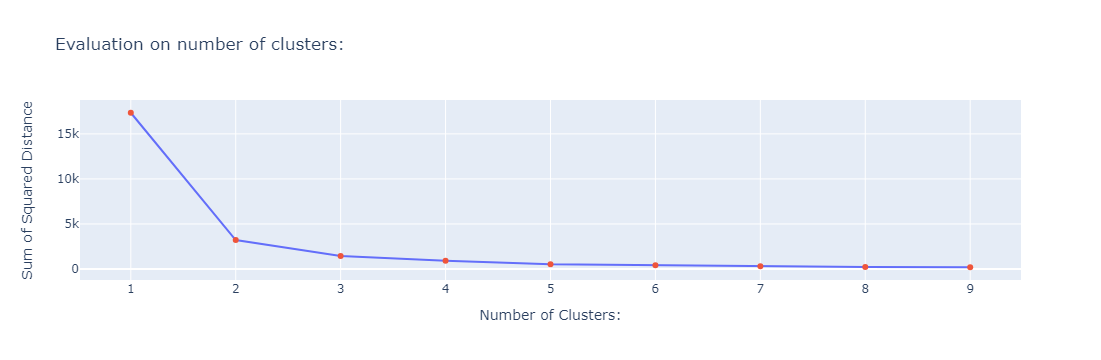

In [12]:
from sklearn.cluster import KMeans
sse = []
target = df1['Temprature'].to_numpy().reshape(-1,1)
num_clusters = list(range(1, 10))

for k in num_clusters:
    km = KMeans(n_clusters=k)
    km.fit(target)
    sse.append(km.inertia_)

fig = go.Figure(data=[
    go.Scatter(x = num_clusters, y=sse, mode='lines'),
    go.Scatter(x = num_clusters, y=sse, mode='markers')
])

fig.update_layout(title="Evaluation on number of clusters:",
                 xaxis_title = "Number of Clusters:",
                 yaxis_title = "Sum of Squared Distance",
                 showlegend=False)
fig.show()

A cluster size of 3 seems a good choice here

C:\Users\mohdf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\mohdf\AppData\Local\Programs\Python\Python311\Lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



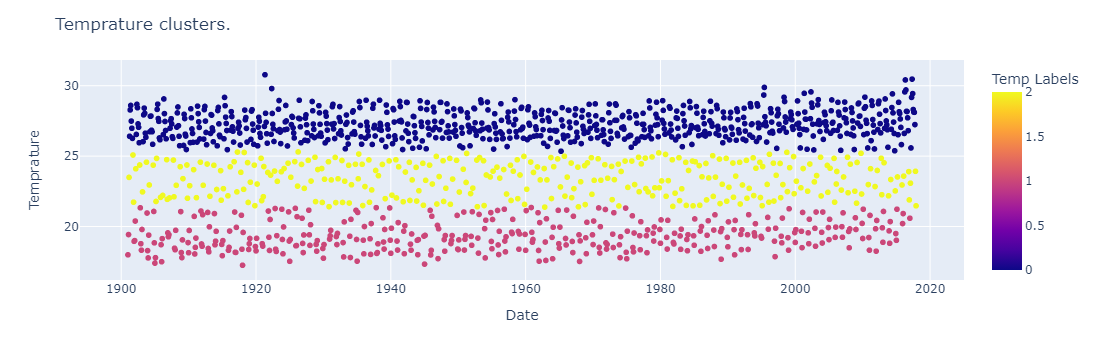

In [13]:
km = KMeans(3)
km.fit(df1['Temprature'].to_numpy().reshape(-1,1))
df1.loc[:,'Temp Labels'] = km.labels_
fig = px.scatter(df1, 'Date', 'Temprature', color='Temp Labels')
fig.update_layout(title = "Temprature clusters.",
                 xaxis_title="Date", yaxis_title="Temprature")
fig.show()

Insights:
Despite having 4 seasons we can see 3 main clusters based on temperatures.
Jan, Feb and Dec are the coldest months.
Apr, May, Jun, Jul, Aug and Sep; all have hotter temperatures.
Mar, Oct and Nov are the months that have temperatures neither too hot nor too cold.

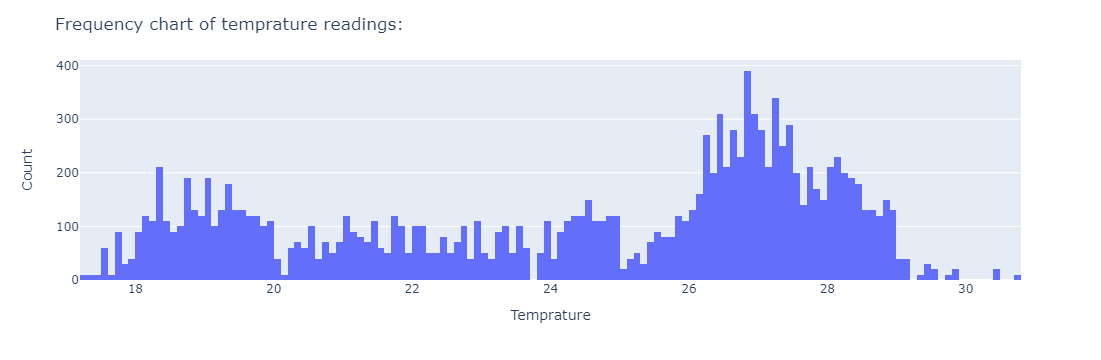

In [14]:
fig = px.histogram(x=df1['Temprature'], nbins=200, histnorm='density')
fig.update_layout(title='Frequency chart of temprature readings:',
                 xaxis_title='Temprature', yaxis_title='Count')

There is a cluster from 26.2-27.5 and mean temperature for most months during history has been between 26.8-26.9

Let’s see if we can get some insights from yearly mean temperature data. I am going to treat this as a time series as well.

Yearly average temperature

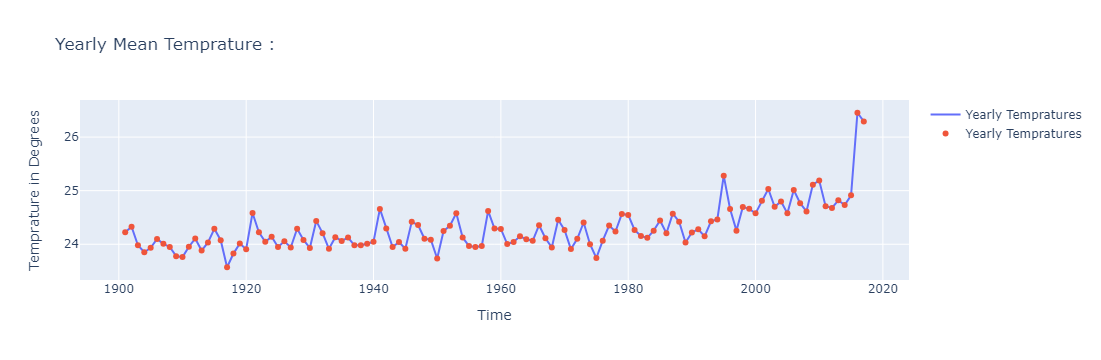

In [15]:
df['Yearly Mean'] = df.iloc[:,1:].mean(axis=1) ## Axis 1 for row wise and axis 0 for columns.
fig = go.Figure(data=[
    go.Scatter(name='Yearly Tempratures' , x=df['YEAR'], y=df['Yearly Mean'], mode='lines'),
    go.Scatter(name='Yearly Tempratures' , x=df['YEAR'], y=df['Yearly Mean'], mode='markers')
])
fig.update_layout(title='Yearly Mean Temprature :',
                 xaxis_title='Time', yaxis_title='Temprature in Degrees')
fig.show()

We can see that the issue of global warning is true.
The yearly mean temperature was not increasing till 1980. It was only after 1979 that we can see the gradual increase in yearly mean temperature.
After 2015, yearly temperature has increased drastically.
But, There are some problems in this figure.
We are seeing a monthly like up-down pattern in yearly temperatures as well.
This is not understandable. Because with months, we have a phenomena of seasons and the earth the revolving around sun in a elliptic path. But this pattern is not expected in yearly temperature.

Monthly temperatures through history

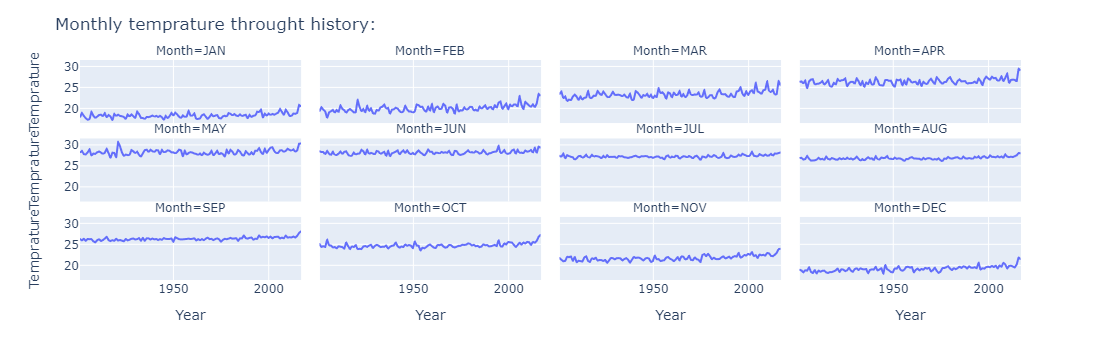

In [16]:
fig = px.line(df1, 'Year', 'Temprature', facet_col='Month', facet_col_wrap=4)
fig.update_layout(title='Monthly temprature throught history:')
fig.show()

We can see clear positive trend lines. Let’s see if we could find any trend in seasonal mean temperatures.

Seasonal Weather Analysis

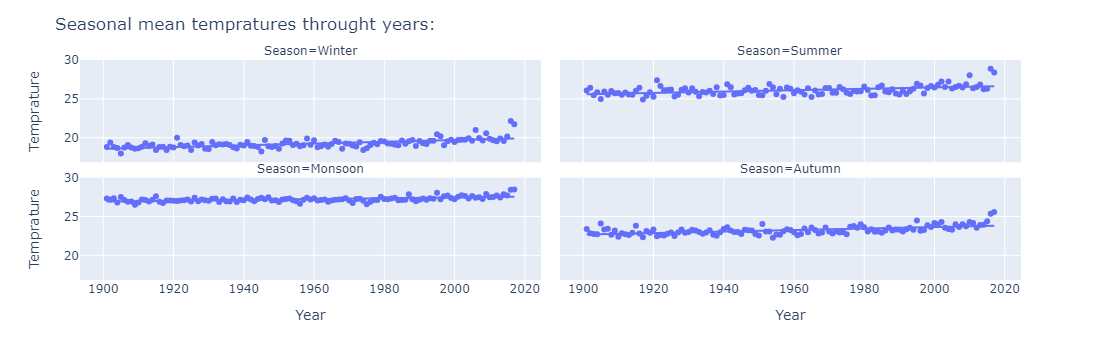

In [19]:
df['Winter'] = df[['DEC', 'JAN', 'FEB']].mean(axis=1)
df['Summer'] = df[['MAR', 'APR', 'MAY']].mean(axis=1)
df['Monsoon'] = df[['JUN', 'JUL', 'AUG', 'SEP']].mean(axis=1)
df['Autumn'] = df[['OCT', 'NOV']].mean(axis=1)
seasonal_df = df[['YEAR', 'Winter', 'Summer', 'Monsoon', 'Autumn']]
seasonal_df = pd.melt(seasonal_df, id_vars='YEAR', value_vars=seasonal_df.columns[1:])
seasonal_df.columns=['Year', 'Season', 'Temprature']

fig = px.scatter(seasonal_df, 'Year', 'Temprature', facet_col='Season', facet_col_wrap=2, trendline='ols')
fig.update_layout(title='Seasonal mean tempratures throught years:')
fig.show()

We can again see a positive trend line between temperature and time. The trend line does not have a very high positive correlation with years but still it is not negligible.

Let’s try to find out if we can get something out of an animation

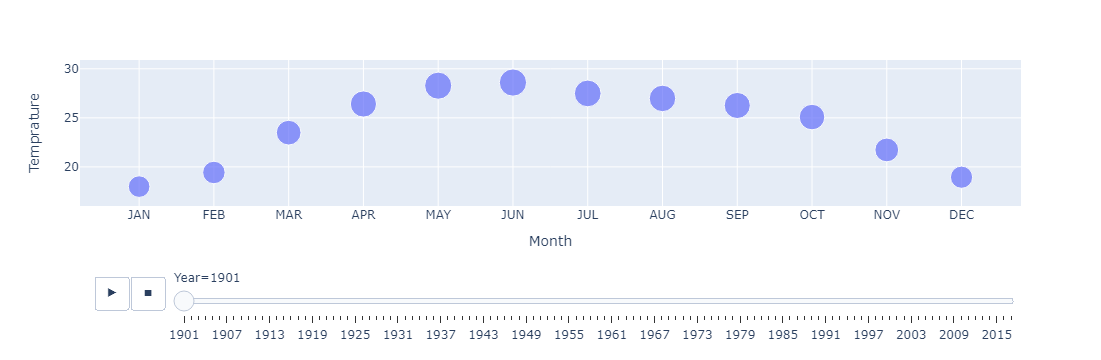

In [20]:
px.scatter(df1, 'Month', 'Temprature', size='Temprature', animation_frame='Year')

On first look, we can see some fluctuations but that doesn’t give much of insights for us. However, if we again see by arranging bar below to early years and late years we can notice the change.

But this is certainly not the best way to visualize it. Let’s find some better way.

Weather Forecasting with Machine Learning
Let’s try to forecast monthly mean temperature for year 2018.

In [21]:
# I am using decision tree regressor for prediction as the data does not actually have a linear trend.
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score 

df2 = df1[['Year', 'Month', 'Temprature']].copy()
df2 = pd.get_dummies(df2)
y = df2[['Temprature']]
x = df2.drop(columns='Temprature')

dtr = DecisionTreeRegressor()
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.3)
dtr.fit(train_x, train_y)
pred = dtr.predict(test_x)
r2_score(test_y, pred)

0.9671643973718844

A high r2 value means that our predictive model is working good. Now, Let’s see the foretasted data for 2018.

In [22]:
next_Year = df1[df1['Year']==2017][['Year', 'Month']]
next_Year.Year.replace(2017,2018, inplace=True)
next_Year= pd.get_dummies(next_Year)
temp_2018 = dtr.predict(next_Year)

temp_2018 = {'Month':df1['Month'].unique(), 'Temprature':temp_2018}
temp_2018=pd.DataFrame(temp_2018)
temp_2018['Year'] = 2018
temp_2018

Month  Temprature  Year
0    JAN       20.59  2018
1    FEB       23.08  2018
2    MAR       25.58  2018
3    APR       29.17  2018
4    MAY       28.82  2018
5    JUN       29.44  2018
6    JUL       28.03  2018
7    AUG       28.12  2018
8    SEP       28.11  2018
9    OCT       27.24  2018
10   NOV       23.92  2018
11   DEC       21.47  2018

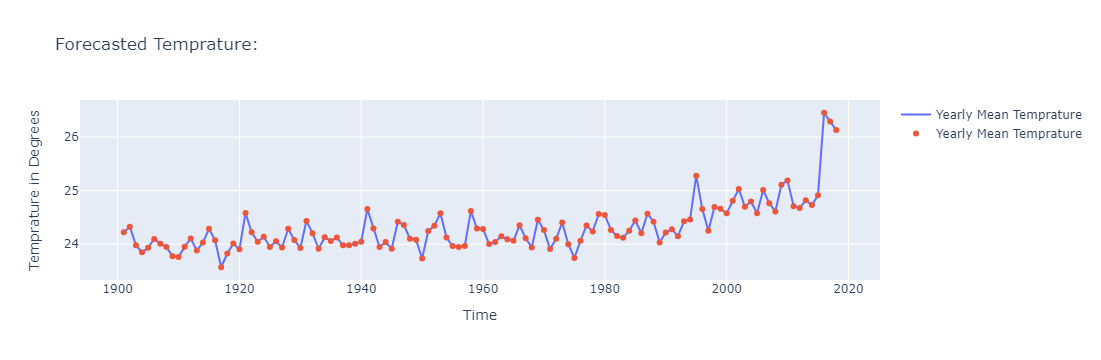

In [23]:
forecasted_temp = pd.concat([df1,temp_2018], sort=False).groupby(by='Year')['Temprature'].mean().reset_index()
fig = go.Figure(data=[
    go.Scatter(name='Yearly Mean Temprature', x=forecasted_temp['Year'], y=forecasted_temp['Temprature'], mode='lines'),
    go.Scatter(name='Yearly Mean Temprature', x=forecasted_temp ['Year'], y=forecasted_temp['Temprature'], mode='markers')
])
fig.update_layout(title='Forecasted Temprature:',
                 xaxis_title='Time', yaxis_title='Temprature in Degrees')
fig.show()